<a href="https://colab.research.google.com/github/gabrielyyytte/1-uzd/blob/master/bk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# Load the CSV file using numpy.genfromtxt()
data = np.genfromtxt('/content/gdrive/MyDrive/Bakalauras/train_data_RR_1_MIT_05_31.csv', delimiter=',')

# data = np.genfromtxt('/content/gdrive/MyDrive/Bakalauras/validation_data_RR_1_MIT_05_31.csv', delimiter=',')

# Assuming you have a numpy array called "data" with the first row containing column names
# To remove the first row and keep the rest of the data
data = data[1:, :]

In [ ]:
import numpy as np

corr = np.corrcoef(data[:, 2], data[:, 24])[0, 1]
print(corr)

-0.013145878076534714


In [ ]:
print(data[:, 2])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
import numpy as np

# Assuming you have a numpy array called "data" with 1000 rows and 201 columns
# To get the correlation between column 0 and columns 1 to 200
corrs = []
for i in range(24, 224):
    corr = np.corrcoef(data[:,2], data[:,i])[0,1]
    corrs.append(corr)

print(corrs)


[-0.02071942462529197, -0.022663655719691384, -0.023529210655298987, -0.02327359416986724, -0.02124041579168903, -0.017977627590296582, -0.012551308757723248, -0.0049115827264507575, 0.004487786637273455, 0.015352111659866299, 0.027296560550088663, 0.04016019695497156, 0.05397064811278277, 0.06758909476274183, 0.08125191234145965, 0.09453947297483721, 0.10748563188857121, 0.11999156148520561, 0.13149753827230193, 0.14134006142558164, 0.15004283538246663, 0.15627101874891428, 0.16059275073045315, 0.16250171966943935, 0.1616346353080547, 0.15822491800448787, 0.1533121971397495, 0.14718824985964343, 0.1398581610613211, 0.13242106782208807, 0.1257223997740621, 0.12068369742868756, 0.11675040177475353, 0.11389259185178728, 0.11289887696030895, 0.11336289946892934, 0.11498043527588835, 0.11781220146962579, 0.12150866887841014, 0.12638867494352543, 0.13231338714847776, 0.13900198199308808, 0.14600117921879008, 0.15144403178108506, 0.15296104184386142, 0.14966714954151605, 0.1407449973487397, 

In [ ]:
import numpy as np

# Assuming you have a numpy array called "data" with 1000 rows and 201 columns
# To get the correlation between column 0 and columns 1 to 200
max_corr = -1
max_corr_index = -1
for i in range(24, 224):
    corr = np.corrcoef(data[:,2], data[:,i])[0,1]
    if corr > max_corr:
        max_corr = corr
        max_corr_index = i

print(f"The column with the highest correlation with column 2 is column {max_corr_index} with a correlation coefficient of {max_corr}")


The column with the highest correlation with column 2 is column 84 with a correlation coefficient of 0.2795063890975358


-------PREPARING ENVIRONMENT--------

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Apr 13 09:05:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    43W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


--------DATA PREPROCESSING--------------

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# # Load the CSV file using numpy.genfromtxt()
# data = np.genfromtxt('/content/gdrive/MyDrive/Bakalauras/train_data_RR_1_MIT_05_31.csv', delimiter=',')


# data = np.delete(data, 0, axis=0)
# data = np.delete(data, 0, axis=1)

# train_labels = data[:, 1]
# train_data = np.delete(data, 1, axis=1)

# print("Initial data")
# print("Class 0:")
# print(np.count_nonzero(train_labels == 0))
# print("Class 1:")
# print(np.count_nonzero(train_labels == 1))
# print("Class 2:")
# print(np.count_nonzero(train_labels == 2))
# print("Initial data length:")
# print(len(train_labels))

# # Split the data into training and validation sets
# train_data, validation_data, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# print("Training data")
# print("Class 0:")
# print(np.count_nonzero(train_labels == 0))
# print("Class 1:")
# print(np.count_nonzero(train_labels == 1))
# print("Class 2:")
# print(np.count_nonzero(train_labels == 2))
# print("Training data length:")
# print(len(train_labels))

# print("Validation data")
# print("Class 0:")
# print(np.count_nonzero(validation_labels == 0))
# print("Class 1:")
# print(np.count_nonzero(validation_labels == 1))
# print("Class 2:")
# print(np.count_nonzero(validation_labels == 2))
# print("Validation data length:")
# print(len(validation_labels))



Initial data
Class 0:
86874
Class 1:
2631
Class 2:
6332
Initial data length:
95837
Training data
Class 0:
69530
Class 1:
2079
Class 2:
5060
Training data length:
76669
Validation data
Class 0:
17344
Class 1:
552
Class 2:
1272
Validation data length:
19168


In [ ]:
# print(train_labels==2)
# print(np.count_nonzero(train_labels == 2))


[False False False ... False False False]
5060


In [ ]:
import numpy as np

# Load the CSV file using numpy.genfromtxt()
data = np.genfromtxt('/content/gdrive/MyDrive/Bakalauras/train_data_RR_1_MIT_05_31.csv', delimiter=',')

data = np.delete(data, 0, axis=0)
data = np.delete(data, 0, axis=1)
  
train_labels = data[:, 1]


train_data = np.delete(data, np.s_[0:23], axis=1) # taip neisvestinius
# train_data = np.delete(data, 1, axis=1) - taip visus duomenis paimt

print(train_data.shape)

print("Initial data")
print("Class 0:")
print(np.count_nonzero(train_labels == 0))
print("Class 1:")
print(np.count_nonzero(train_labels == 1))
print("Class 2:")
print(np.count_nonzero(train_labels == 2))
print("Initial data length:")
print(len(train_labels))

(95837, 200)
Initial data
Class 0:
86874
Class 1:
2631
Class 2:
6332
Initial data length:
95837


In [ ]:
print(train_data[0])
print(train_data[1])

[-0.4260086  -0.41783231 -0.41038562 -0.41847296 -0.41991059 -0.41400135
 -0.42440166 -0.42170728 -0.41353466 -0.40875325 -0.37571633 -0.35582283
 -0.34535175 -0.32441915 -0.31346739 -0.31645777 -0.3067997  -0.29148796
 -0.29419598 -0.28245397 -0.27450254 -0.28128331 -0.28081842 -0.28558568
 -0.29982938 -0.28698898 -0.28908983 -0.30492281 -0.29511287 -0.29462684
 -0.30359622 -0.30141855 -0.30170421 -0.31665408 -0.31069533 -0.30909464
 -0.33040392 -0.32060776 -0.32014797 -0.32906227 -0.3248945  -0.3310804
 -0.34951126 -0.32096013 -0.32812272 -0.34039844 -0.33882485 -0.33978586
 -0.34835392 -0.33903721 -0.33889447 -0.34267545 -0.33489067 -0.32663373
 -0.33655184 -0.32628156 -0.32497723 -0.32793683 -0.32017565 -0.31981748
 -0.34148911 -0.31989143 -0.32033208 -0.33032194 -0.31964282 -0.30999308
 -0.2930267  -0.25993791 -0.25200324 -0.25588202 -0.22091273 -0.22752857
 -0.22089899 -0.22875327 -0.23874572 -0.24365724 -0.24143633 -0.23380085
 -0.21505337 -0.22485569 -0.26317053 -0.28924943 -0.

In [ ]:
print(np.where(train_labels == 1))
print(np.where(train_labels == 2))

(array([  220,   248,   332, ..., 93519, 93543, 93549]),)
(array([ 1896,  4328,  4337, ..., 93599, 93600, 95769]),)


In [ ]:
import random

index_0 = np.where(train_labels == 0)
index_0 = np.random.choice(index_0[0], 800, replace=False)
data_0 = train_data[index_0]

index_1 = np.where(train_labels == 1)
index_1 = np.random.choice(index_1[0], 800, replace=False)
data_1 = train_data[index_1]

index_2 = np.where(train_labels == 2)
index_2 = np.random.choice(index_2[0], 800, replace=False)
data_2 = train_data[index_2]

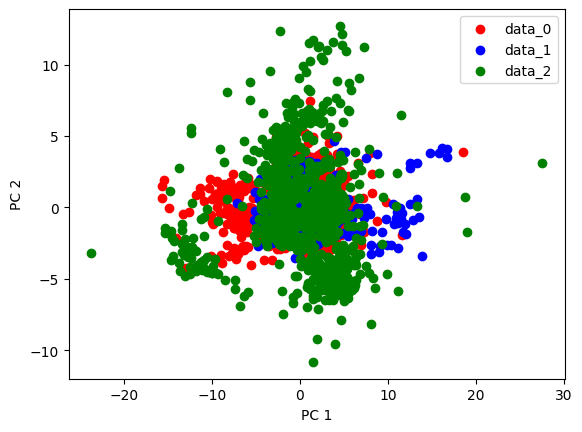

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
data_0_reduced = pca.fit_transform(data_0)
data_1_reduced = pca.fit_transform(data_1)
data_2_reduced = pca.fit_transform(data_2)

# Plot data_0 in red
plt.scatter(data_0_reduced[:, 0], data_0_reduced[:, 1], c='red', label='data_0')

# Plot data_1 in blue
plt.scatter(data_1_reduced[:, 0], data_1_reduced[:, 1], c='blue', label='data_1')

# Plot data_2 in green
plt.scatter(data_2_reduced[:, 0], data_2_reduced[:, 1], c='green', label='data_2')

# Add axis labels and legend
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

# Show the plot
plt.show()


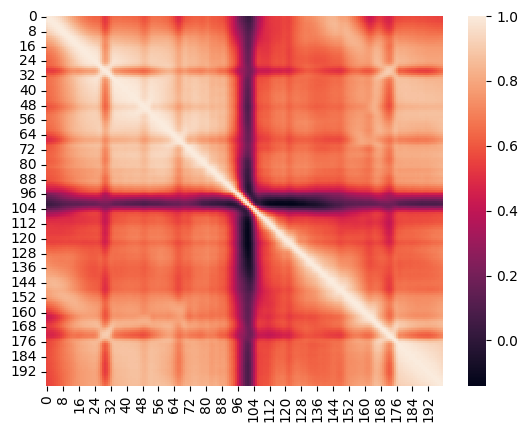

In [ ]:
import numpy as np
import seaborn as sns

# Assuming you have a 1000x200 numpy array called "data"
# Calculate the correlation matrix
corr_matrix = np.corrcoef(data_0, rowvar=False)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix)

# Show the plot
plt.show()


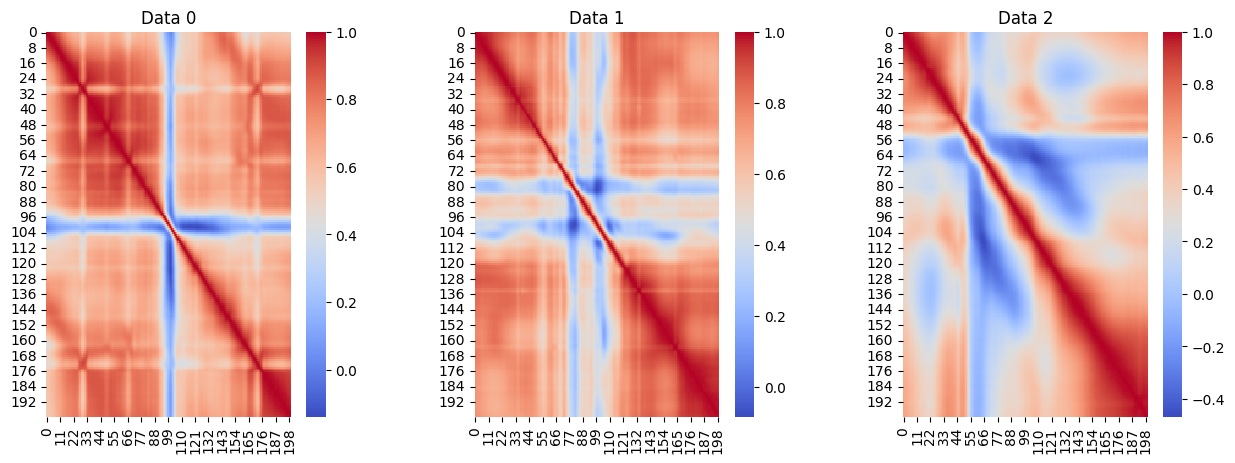

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have three 1000x200 numpy arrays called "data_0", "data_1", and "data_2"
# Calculate the correlation matrices
corr_matrix_0 = np.corrcoef(data_0, rowvar=False)
corr_matrix_1 = np.corrcoef(data_1, rowvar=False)
corr_matrix_2 = np.corrcoef(data_2, rowvar=False)

# Create subplots for each correlation matrix
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Plot the heatmaps for each correlation matrix
sns.heatmap(corr_matrix_0, ax=axes[0], cmap='coolwarm')
sns.heatmap(corr_matrix_1, ax=axes[1], cmap='coolwarm')
sns.heatmap(corr_matrix_2, ax=axes[2], cmap='coolwarm')

# Set the titles for each subplot
axes[0].set_title('Data 0')
axes[1].set_title('Data 1')
axes[2].set_title('Data 2')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


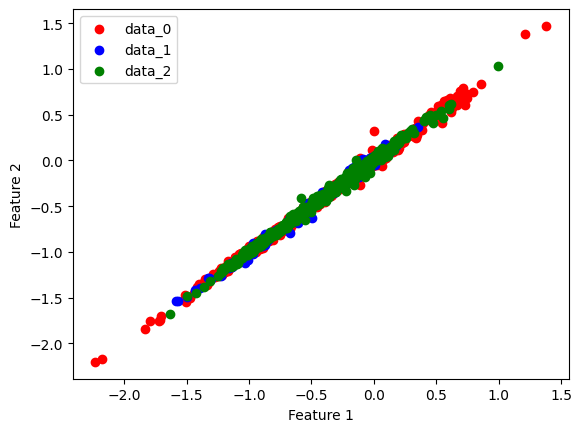

In [ ]:
import matplotlib.pyplot as plt

# Plot data_0 in red
plt.scatter(data_0[:, 0], data_0[:, 1], c='red', label='data_0')

# Plot data_1 in blue
plt.scatter(data_1[:, 0], data_1[:, 1], c='blue', label='data_1')

# Plot data_2 in green
plt.scatter(data_2[:, 0], data_2[:, 1], c='green', label='data_2')

# Add axis labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import random

t_index_0 = np.where(test_labels == 0)
t_index_0 = np.random.choice(t_index_0[0], 800, replace=False)
t_data_0 = train_data[t_index_0]

t_index_1 = np.where(test_labels == 1)
t_index_1 = np.random.choice(t_index_1[0], 800, replace=False)
t_data_1 = train_data[t_index_1]

t_index_2 = np.where(test_labels == 2)
t_index_2 = np.random.choice(t_index_2[0], 800, replace=False)
t_data_2 = train_data[t_index_2]

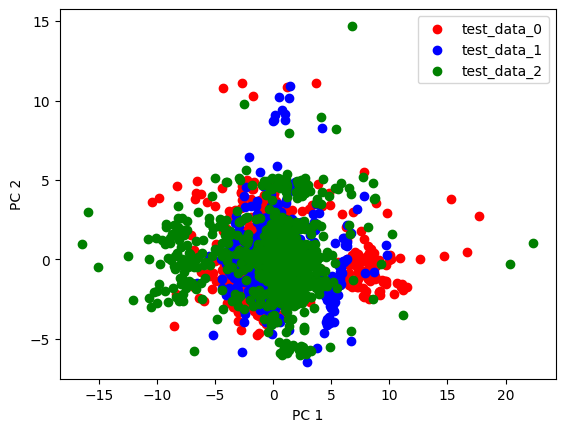

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
t_data_0_reduced = pca.fit_transform(t_data_0)
t_data_1_reduced = pca.fit_transform(t_data_1)
t_data_2_reduced = pca.fit_transform(t_data_2)

# Plot data_0 in red
plt.scatter(t_data_0_reduced[:, 0], t_data_0_reduced[:, 1], c='red', label='test_data_0')

# Plot data_1 in blue
plt.scatter(t_data_1_reduced[:, 0], t_data_1_reduced[:, 1], c='blue', label='test_data_1')

# Plot data_2 in green
plt.scatter(t_data_2_reduced[:, 0], t_data_2_reduced[:, 1], c='green', label='test_data_2')

# Add axis labels and legend
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

# Show the plot
plt.show()


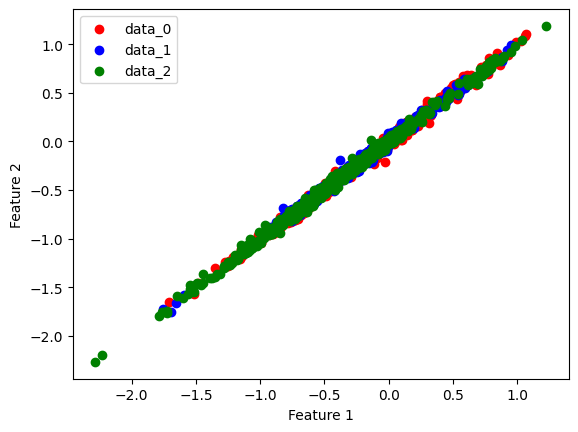

In [ ]:
import matplotlib.pyplot as plt

# Plot data_0 in red
plt.scatter(t_data_0[:, 0], t_data_0[:, 1], c='red', label='data_0')

# Plot data_1 in blue
plt.scatter(t_data_1[:, 0], t_data_1[:, 1], c='blue', label='data_1')

# Plot data_2 in green
plt.scatter(t_data_2[:, 0], t_data_2[:, 1], c='green', label='data_2')

# Add axis labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()

----------DATA BALANCING----------

In [ ]:
# SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
smote_train_data, smote_labels = smote.fit_resample(train_data, train_labels)

print("SMOTE balanced data")
print("Class 0:")
print(np.count_nonzero(smote_labels == 0))
print("Class 1:")
print(np.count_nonzero(smote_labels == 1))
print("Class 2:")
print(np.count_nonzero(smote_labels == 2))
print("SMOTE data length:")
print(len(smote_labels))

SMOTE balanced data
Class 0:
86874
Class 1:
86874
Class 2:
86874
SMOTE data length:
260622


In [ ]:
# RANDOM OVERSAMPLING
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=42)
random_oversampling_train_data, random_oversampling_labels = oversample.fit_resample(train_data, train_labels)

print("RANDOM OVERSAMPLING balanced data")
print("Class 0:")
print(np.count_nonzero(random_oversampling_labels == 0))
print("Class 1:")
print(np.count_nonzero(random_oversampling_labels == 1))
print("Class 2:")
print(np.count_nonzero(random_oversampling_labels == 2))
print("RANDOM OVERSAMPLING data length:")
print(len(random_oversampling_labels))

RANDOM OVERSAMPLING balanced data
Class 0:
86874
Class 1:
86874
Class 2:
86874
RANDOM OVERSAMPLING data length:
260622


In [ ]:
# RANDOM UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
random_undersampling_train_data, random_undersampling_labels = undersample.fit_resample(train_data, train_labels)


print("RANDOM UNDERSAMPLING balanced data")
print("Class 0:")
print(np.count_nonzero(random_undersampling_labels == 0))
print("Class 1:")
print(np.count_nonzero(random_undersampling_labels == 1))
print("Class 2:")
print(np.count_nonzero(random_undersampling_labels == 2))
print("RANDOM UNDERSAMPLING data length:")
print(len(random_undersampling_labels))

RANDOM UNDERSAMPLING balanced data
Class 0:
2631
Class 1:
2631
Class 2:
2631
RANDOM UNDERSAMPLING data length:
7893


In [ ]:
# # DISTRIBUSION BASES DATA SAMPLING

# print("DBDS balanced data")
# print("Class 0:")
# print(dbds_labels.count(0))
# print("Class 1:")
# print(dbds_labels.count(1))
# print("Class 2:")
# print(dbds_labels.count(2))
# print("DBDS data length:")
# print(len(undersampling_labels))

In [ ]:
# ALL K-NEAREST NEIGHBOUR
# from imblearn.under_sampling import AllKNN

# all_knn = AllKNN(random_state=42)
# all_knn_train_data, all_knn_labels = all_knn.fit_resample(train_data, train_labels)


# print("ALL K-NEAREST NEAREST NEIGHBOUR balanced data")
# print("Class 0:")
# print(np.count_nonzero(all_knn_labels == 0))
# print("Class 1:")
# print(np.count_nonzero(all_knn_labels == 1))
# print("Class 2:")
# print(np.count_nonzero(all_knn_labels == 2))
# print("ALL K-NEAREST NEAREST NEIGHBOUR data length:")
# print(len(all_knn_labels))

In [ ]:
# model.output_shape

(None, 3)

--------TRAINING---------

In [ ]:
# from tensorflow import keras

# # Import provided model
# model = keras.models.load_model('/content/gdrive/MyDrive/Bakalauras/best_model_final.h5')

In [ ]:
# print(primary_model.metrics)
# print(model.metrics)

[<keras.metrics.base_metric.Mean object at 0x7f29d731a730>, <keras.metrics.accuracy_metrics.SparseCategoricalAccuracy object at 0x7f2458d5f8b0>, <__main__.FixedMean object at 0x7f29d72e69a0>]
[<keras.metrics.base_metric.Mean object at 0x7f29e342adf0>, <keras.metrics.accuracy_metrics.SparseCategoricalAccuracy object at 0x7f29e341e340>]


In [ ]:
# def train(train_data, train_labels, validation_data, validation_labels):
#   # Copying layers from the provided model
#   new_model = keras.models.clone_model(model)
  
#   # Compiling - adding optimizer, loss function, metrics
#   new_model.compile(
#     optimizer=keras.optimizers.Adam(), # Optimizer
#     # Loss function to minimize
#     loss=keras.losses.SparseCategoricalCrossentropy(),
#     # List of metrics to monitor
#     metrics=[keras.metrics.SparseCategoricalAccuracy(), "MAE"],
#   )
  
#   # Training
#   new_model.fit(
#     train_data,
#     train_labels,
#     epochs=10,
#     validation_data=(validation_data, validation_labels)
#   )

#   return new_model

In [ ]:
# import matplotlib.pyplot as plt

# def train(train_data, train_labels, validation_data, validation_labels):
#     # Copying layers from the provided model
#     new_model = keras.models.clone_model(model)

#     # Compiling - adding optimizer, loss function, metrics
#     new_model.compile(
#         optimizer=keras.optimizers.Adam(),
#         loss=keras.losses.SparseCategoricalCrossentropy(),
#         metrics=[keras.metrics.SparseCategoricalAccuracy(), "MAE"],
#     )

#     # Training
#     history = new_model.fit(
#         train_data,
#         train_labels,
#         epochs=15,
#         validation_data=(validation_data, validation_labels)
#     )


#     # Plotting model accuracy
#     plt.plot(history.history['sparse_categorical_accuracy'])
#     plt.plot(history.history['val_sparse_categorical_accuracy'])
#     plt.title('Model Accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()

#     # Plotting model loss
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('Model Loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['train', 'validation'], loc='upper left')
#     plt.show()

#     return new_model


Training primary model
Epoch 1/15
2396/2396 [==============================] - 226s 91ms/step - loss: 0.1853 - sparse_categorical_accuracy: 0.9454 - MAE: 0.4304 - val_loss: 0.4190 - val_sparse_categorical_accuracy: 0.9211 - val_MAE: 0.4314
Epoch 2/15
2396/2396 [==============================] - 218s 91ms/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9713 - MAE: 0.4304 - val_loss: 0.7944 - val_sparse_categorical_accuracy: 0.7911 - val_MAE: 0.4314
Epoch 3/15
2396/2396 [==============================] - 218s 91ms/step - loss: 0.0671 - sparse_categorical_accuracy: 0.9806 - MAE: 0.4304 - val_loss: 3.8033 - val_sparse_categorical_accuracy: 0.3035 - val_MAE: 0.4314
Epoch 4/15
2396/2396 [==============================] - 218s 91ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0.9848 - MAE: 0.4304 - val_loss: 2.7655 - val_sparse_categorical_accuracy: 0.4407 - val_MAE: 0.4314
Epoch 5/15
2396/2396 [==============================] - 218s 91ms/step - loss: 0.0456 - sparse_categorical_ac

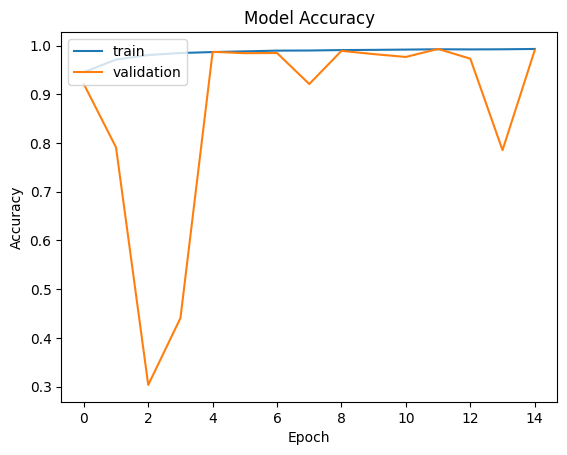

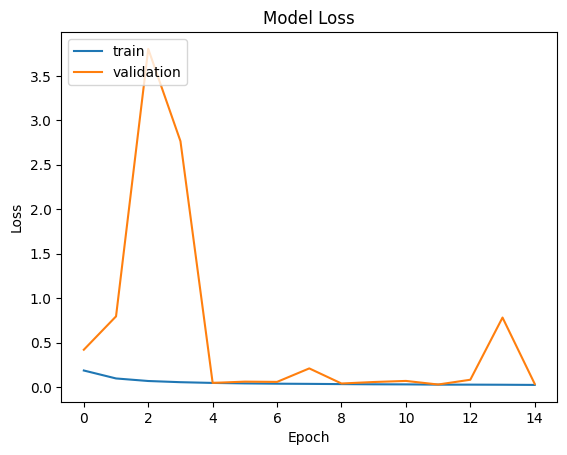

In [ ]:
#After training the model, save with proper naming - For example, for SMOTE balancing, name the model - "SMOTE_model.h5"
# print("Training primary model")
# primary_model = train(train_data, train_labels, validation_data, validation_labels)
# print("Training SMOTE model")
# smote_model = train(smote_train_data, smote_labels)
# print("Training random oversampling model")
# random_oversampling_model = train(random_oversampling_train_data, random_oversampling_labels)
# print("Training random undersampling model")
# random_undersampling_model = train(random_undersampling_train_data, random_undersampling_labels)
# print("Training CNN model")
# cnn_model = train(cnn_train_data, cnn_labels)

# primary_model.save('/content/gdrive/MyDrive/Bakalauras/primary_model.h5')
# smote_model.save('/content/gdrive/MyDrive/Bakalauras/smote_model.h5')
# random_oversampling_model.save('/content/gdrive/MyDrive/Bakalauras/random_oversampling_model.h5')
# random_undersampling_model.save('/content/gdrive/MyDrive/Bakalauras/random_undersampling_model.h5')
# cnn_model.save('/content/gdrive/MyDrive/Bakalauras/cnn_model.h5')


In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, cross_val_predict
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

def find_random_forest_hyperparams(train_data, train_labels):
    param_grid = {
    'n_estimators': [75, 88, 100],
    'max_features': ['sqrt'],
    'max_depth': [16, 18, None],
    'max_leaf_nodes': [15, 18, None],
    }

    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Use random search to find the best hyperparameters
    rand_search = RandomizedSearchCV(rf, param_grid)

    # Fit the random search object to the data
    rand_search.fit(train_data, train_labels)

    # Create a variable for the best model
    best_rf = rand_search.best_estimator_

    # Print the best hyperparameters
    print('Best hyperparameters:',  rand_search.best_params_)

    return best_rf


def train_random_forest(train_data, train_labels):
    # Create a random forest classifier
    
    # rf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=None, max_features="sqrt", max_depth=18)

    # n_estimators': 88, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': None

    rf = RandomForestClassifier(n_estimators=88, max_leaf_nodes=None, max_features="sqrt", max_depth=None)

    # Fit the random search classifier to the data
    rf.fit(train_data, train_labels)
    predicted_labels = cross_val_predict(rf, train_data, train_labels, cv=10)

    accuracy = accuracy_score(train_labels, predicted_labels)
    confusion_mat = confusion_matrix(train_labels, predicted_labels)
    classif_report = classification_report(train_labels, predicted_labels)

    print("Classification report:")
    print(classif_report)
    print("Accuracy: %0.2f" % accuracy)
    print("Confusion matrix:")
    print(confusion_mat)

    return rf

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)

# PREPARING TEST DATA
test_data = np.genfromtxt('/content/gdrive/MyDrive/Bakalauras/validation_data_RR_1_MIT_05_31.csv', delimiter=',')

test_data = np.delete(test_data, 0, axis=0)
test_data = np.delete(test_data, 0, axis=1)

test_labels = test_data[:, 1]

# test_data = np.delete(test_data, 1, axis=1) - taip visus duomenis paimt
test_data = np.delete(test_data, np.s_[0:23], axis=1)

print(test_data.shape)
print(test_data[0])
print(test_data[1])

print("Testing data")
print("Class 0:")
print(np.count_nonzero(test_labels == 0))
print("Class 1:")
print(np.count_nonzero(test_labels == 1))
print("Class 2:")
print(np.count_nonzero(test_labels == 2))
print("Testing data length:")
print(len(test_labels))

(47236, 200)
[-0.21599528 -0.19307335 -0.18661066 -0.19514025 -0.13276173 -0.1124665
 -0.10935421 -0.1426628  -0.17791449 -0.17817124 -0.17560612 -0.24593872
 -0.2705422  -0.28490684 -0.29535275 -0.30278178 -0.31730423 -0.31011671
 -0.31871943 -0.3254678  -0.31938747 -0.33564626 -0.32561992 -0.3157154
 -0.32790046 -0.31534278 -0.32999731 -0.31565165 -0.29678601 -0.30985787
 -0.2949204  -0.29579796 -0.29640276 -0.27471377 -0.28994307 -0.31173683
 -0.30646148 -0.29401056 -0.28603309 -0.30280573 -0.28048899 -0.27200648
 -0.29510342 -0.29407065 -0.28695332 -0.28543855 -0.27201827 -0.30267827
 -0.30033942 -0.28688932 -0.29836873 -0.28937151 -0.27697054 -0.27940239
 -0.28448071 -0.29540102 -0.29031166 -0.28526381 -0.2895334  -0.27807289
 -0.30774972 -0.31540418 -0.30068266 -0.30376178 -0.28685273 -0.29061785
 -0.30516083 -0.28068085 -0.27756465 -0.27707654 -0.26951423 -0.26677216
 -0.25191546 -0.2623548  -0.2192086  -0.1440829  -0.10905524 -0.1185778
 -0.12837347 -0.16002513 -0.18432495 -0.2

Training primary model
Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     86874
         1.0       0.84      0.53      0.65      2631
         2.0       0.92      0.83      0.87      6332

    accuracy                           0.97     95837
   macro avg       0.91      0.79      0.84     95837
weighted avg       0.97      0.97      0.97     95837

Accuracy: 0.97
Confusion matrix:
[[86225   239   410]
 [ 1185  1404    42]
 [ 1051    30  5251]]
----------
Testing primary model


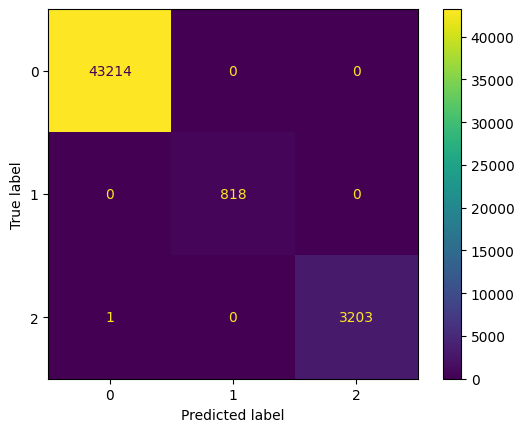

In [ ]:
#After training the model, save with proper naming - For example, for SMOTE balancing, name the model - "SMOTE_model.h5"
print("Training primary model")
# best_rf = find_random_forest_hyperparams(train_data, train_labels)
best_rf = train_random_forest(train_data, train_labels)
print("----------")
print("Testing primary model")
# Generate predictions with the best model

# KITAM LANGE PALEIST SITAS LIKUSIAS EILUTES

y_pred = best_rf.predict(test_data)

# Create the confusion matrix
cm = confusion_matrix(test_labels, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# Classifier saving to file
# import joblib

# save
# joblib.dump(best_rf, '/content/gdrive/MyDrive/Bakalauras/my_random_forest.joblib')

# load
# loaded_best_rf = joblib.load('/content/gdrive/MyDrive/Bakalauras/my_random_forest.joblib')

In [ ]:
# from sklearn import tree
# import matplotlib.pyplot as plt

# fn= ['seq_size' , 'RR_l_0',	'RR_r_0',	'RR_r/RR_l','wl_side',	'wr_side',	'signal_mean',	'signal_std',	'P_val',	'Q_val',	'R_val',	'S_val',	'T_val',	'P_pos',	'Q_pos',	'R_pos',	'S_pos',	'T_pos',	'QRS',	'PR',	'ST',	'QT',
# '0',	'1',	'2',	'3',	'4',	'5',	'6',	'7',	'8',	'9',	'10',	'11',	'12',	'13',	'14',	'15',	'16',	'17',	'18',	'19',	'20',	'21',	'22',	'23',	'24',	'25',	'26',	'27',	'28',	'29',	'30',	'31',	'32',
# '33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',	'42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',	'54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
# '66',	'67',	'68', '69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',	'78', '79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',	'90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',
# '101',	'102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',	'114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',	'126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',
# '135',	'136',	'137',	'138',	'139',	'140',	'141',	'142',	'143',	'144',	'145',	'146',	'147',	'148',	'149',	'150',	'151',	'152',	'153',	'154',	'155',	'156',	'157',	'158',	'159',	'160',	'161',	'162',	'163',	'164',	'165',	'166',	'167',	'168',
# '169',	'170',	'171',	'172',	'173',	'174',	'175',	'176',	'177',	'178',	'179',	'180',	'181',	'182',	'183',	'184',	'185',	'186',	'187',	'188',	'189',	'190',	'191',	'192',	'193',	'194',	'195',	'196',	'197',	'198',	'199']
# cn= ['0','1','2']
# fig, axes = plt.subplots(nrows = 1,ncols = 200,figsize = (10,10), dpi=3000)
# for index in range(0, 15):
#     print(index)
#     tree.plot_tree(loaded_best_rf.estimators_[index],
#                    feature_names = fn, 
#                    class_names=cn,
#                    filled = True,
#                    ax = axes[index]);
    
#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
#     fig.savefig('tree_' + str(index) + '.png')

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     43214
         1.0       1.00      1.00      1.00       818
         2.0       1.00      1.00      1.00      3204

    accuracy                           1.00     47236
   macro avg       1.00      1.00      1.00     47236
weighted avg       1.00      1.00      1.00     47236

Accuracy: 1.00
Confusion matrix:
[[43214     0     0]
 [    0   818     0]
 [    1     0  3203]]


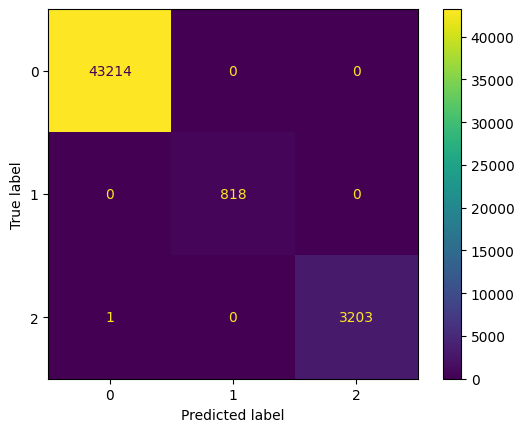

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, cross_val_predict
from scipy.stats import randint
# KITAM LANGE PALEIST SITAS LIKUSIAS EILUTES

y_pred = best_rf.predict(test_data)

# Create the confusion matrix
cm = confusion_matrix(test_labels, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
accuracy = accuracy_score(test_labels, y_pred)
confusion_mat = confusion_matrix(test_labels, y_pred)
classif_report = classification_report(test_labels, y_pred)
print("Classification report:")
print(classif_report)
print("Accuracy: %0.2f" % accuracy)
print("Confusion matrix:")
print(confusion_mat)

Training SMOTE model
----------
Testing primary model


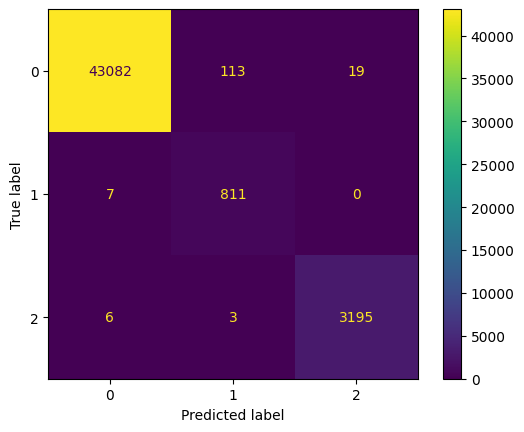

In [ ]:
#After training the model, save with proper naming - For example, for SMOTE balancing, name the model - "SMOTE_model.h5"
print("Training SMOTE model")
best_rf = train_random_forest(smote_train_data, smote_labels)
print("----------")
print("Testing primary model")
# Generate predictions with the best model
y_pred = best_rf.predict(test_data)

# Create the confusion matrix
cm = confusion_matrix(test_labels, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
# print("Training SMOTE model")
# smote_model = train(smote_train_data, smote_labels)

-----------TESTING-------

In [ ]:
from tensorflow import keras

# Import provided model
model = keras.models.load_model('/content/gdrive/MyDrive/Bakalauras/smote_model.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def test(model):
    results = model.evaluate(test_data, test_labels)
    print("test loss, test acc:", results)
  
    y_pred = model.predict(test_data)
  
    predictions = []
    for prediction in y_pred:
        predictions.append(np.argmax(prediction))
    
    print(confusion_matrix(test_labels, predictions))
    print(classification_report(test_labels, predictions))

    report = classification_report(test_labels, predictions, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap="Blues", ax=ax, cbar=False)
    ax.set_ylabel('Labels')
    plt.show()



In [ ]:
!pip install yellowbrick


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras

# Load model for testing. 
primary_model = keras.models.load_model('/content/gdrive/MyDrive/Bakalauras/primary_model.h5')
smote_model = keras.models.load_model('/content/gdrive/MyDrive/Bakalauras/smote_model.h5')
random_oversampling_model = keras.models.load_model('/content/gdrive/MyDrive/Bakalauras/random_oversampling_model.h5')
random_undersampling_model = keras.models.load_model('/content/gdrive/MyDrive/Bakalauras/random_undersampling_model.h5')

Testing primary model
1477/1477 [==============================] - 39s 26ms/step - loss: 0.0248 - sparse_categorical_accuracy: 0.9923 - MAE: 0.4295
test loss, test acc: [0.02484920434653759, 0.9923151731491089, 0.42954501509666443]
1477/1477 [==============================] - 37s 25ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     43214
         1.0       0.90      0.87      0.88       818
         2.0       1.00      0.94      0.97      3204

    accuracy                           0.99     47236
   macro avg       0.96      0.94      0.95     47236
weighted avg       0.99      0.99      0.99     47236



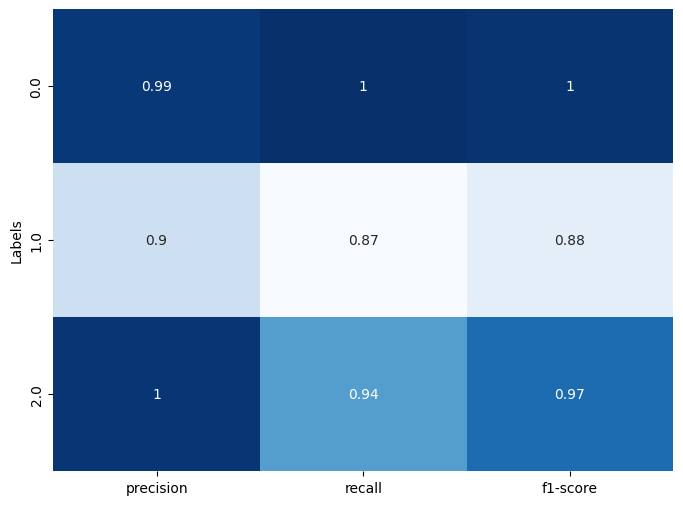

In [ ]:
print("----------")
print("Testing primary model")
test(primary_model)
print("----------")
print("Testing SMOTE")
test(smote_model)
print("----------")
print("Testing random oversampling")
test(random_oversampling_model)
print("----------")
print("Testing random undersampling")
test(random_undersampling_model)

In [ ]:
for layer in primary_model.layers:
  print("CONFIG: ", primary_model.get_layer(name = layer.name).get_config())

CONFIG:  {'name': 'conv1d_6', 'trainable': True, 'dtype': 'float32', 'filters': 240, 'kernel_size': (6,), 'strides': (1,), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1,), 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
CONFIG:  {'name': 'batch_normalization_6', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([2]), 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer

1477/1477 [==============================] - 36s 25ms/step
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     43214
         1.0       0.76      0.97      0.85       818
         2.0       0.98      0.99      0.99      3204

    accuracy                           0.99     47236
   macro avg       0.91      0.99      0.95     47236
weighted avg       0.99      0.99      0.99     47236



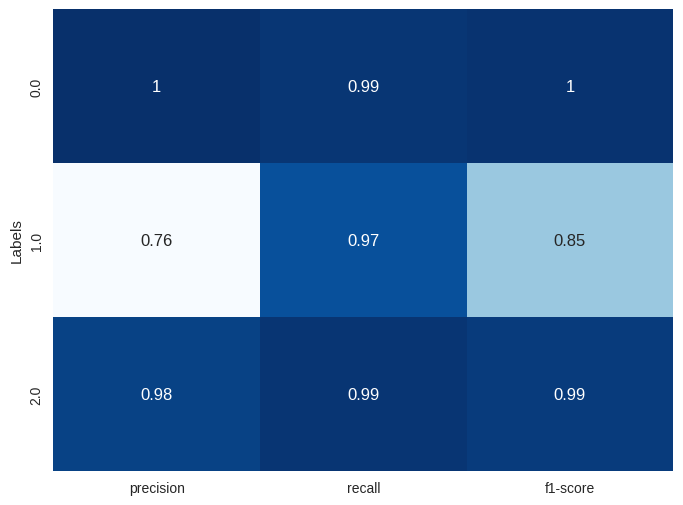

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(validation_data)
predictions = np.argmax(y_pred, axis=1)

print(classification_report(validation_labels, predictions))

report = classification_report(validation_labels, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, cmap="Blues", ax=ax, cbar=False)
ax.set_ylabel('Labels')
plt.show()



In [ ]:
#Confusion matrix

[[43012    26   176]
 [  154   612    52]
 [   21     4  3179]]


-------PRIMARY MODEL---------

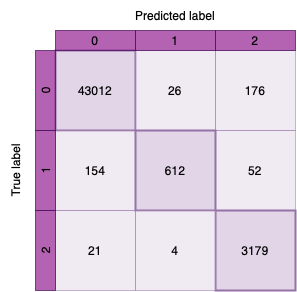

------SMOTE MODEL-------

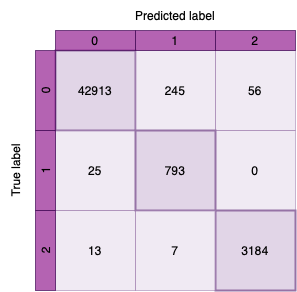

------MODEL WITH RANDOM UNDERSAMPLING-------

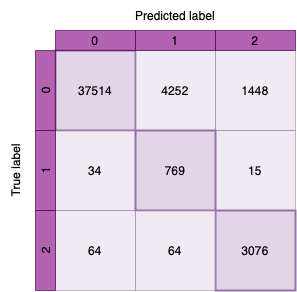

------MODEL WITH RANDOM OVERSAMPLING-------

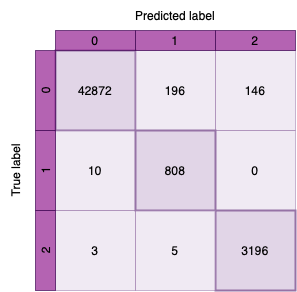

-------UMAP-------

In [ ]:
# Load the CSV file using numpy.genfromtxt()
data = pd.read_csv('/content/gdrive/MyDrive/Bakalauras/train_data_RR_1_MIT_05_31.csv', delimiter=',')

In [ ]:
pip install umap-learn

In [ ]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt



# Initialize UMAP object with hyperparameters
umap_obj = umap.UMAP(n_components=2, n_neighbors=10, metric='euclidean')

# Fit UMAP to data and obtain low-dimensional embedding
embedding = umap_obj.fit_transform(data)
colors = {0.0: 'red', 1.0: 'green', 2.0: 'black'}

# Plot embedding using Matplotlib, coloring by label
labels = data['label'].apply(lambda x: colors[x]).values  # assuming label column is named 'label'
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, s=10)
legend = ax.legend(*scatter.legend_elements(), loc='lower left', title='Labels')
ax.add_artist(legend)
plt.show()